In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import os

In [2]:
df = pd.read_csv("news_dataset.csv")
print("Data loaded successfully!\n")

Data loaded successfully!



In [3]:
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

  label                                               text
0  REAL  Payal has accused filmmaker Anurag Kashyap of ...
1  FAKE  A four-minute-long video of a woman criticisin...
2  FAKE  Republic Poll, a fake Twitter account imitatin...
3  REAL  Delhi teen finds place on UN green list, turns...
4  REAL  Delhi: A high-level meeting underway at reside...

Missing values:
 label    0
text     8
dtype: int64


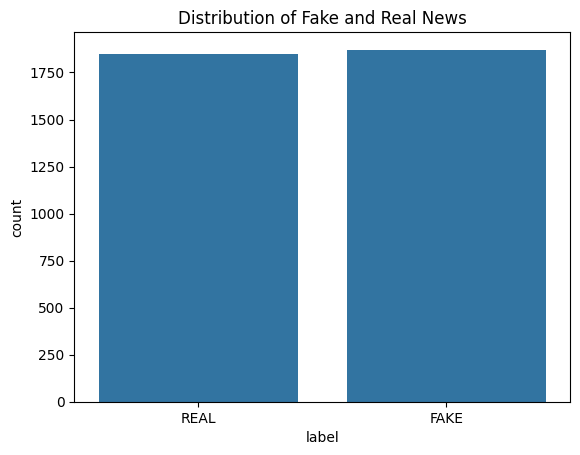

In [7]:
sns.countplot(x='label', data=df)
plt.title("Distribution of Fake and Real News")
plt.show()


In [6]:
df.dropna(subset=['text'], inplace=True)
print("\nMissing values after dropping:\n", df.isnull().sum())


Missing values after dropping:
 label    0
text     0
dtype: int64


In [8]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test_tfidf)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

        FAKE       0.98      1.00      0.99       361
        REAL       1.00      0.98      0.99       384

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745

Accuracy Score: 0.9919463087248322

Confusion Matrix:
 [[361   0]
 [  6 378]]


In [12]:
os.makedirs("model", exist_ok=True)
with open("model/logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)